In [1]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.tokenize import word_tokenize
import numpy as np
from nltk.stem import PorterStemmer 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#import dataset
data=pd.read_csv(r'C:\Users\Admin\IH-Labs\Bootcamp_final_project\csv_file\fake reviews dataset.csv')

In [4]:
data.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


Text(0.5, 1.0, 'label of review')

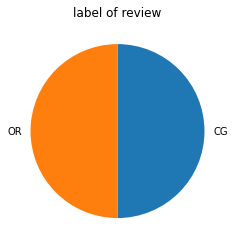

In [70]:
# use a pie plot to find out the distribution of the label
sorted_counts = data['label'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.title('label of review')

In [74]:
# rename the label
data.label=np.where(data.label=='CG',0,1)

In [75]:
data.label.value_counts()

1    20215
0    20205
Name: label, dtype: int64

In [76]:
# drop duplicates and check if there are any NaN values
data=data.drop_duplicates(keep='first')

In [77]:
data.label.value_counts()

1    20215
0    20205
Name: label, dtype: int64

In [10]:
data.isna().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [11]:
data_sample=data.sample(30000)

In [12]:
# Renaming text column
data_sample = data_sample.rename(columns = {'text_': 'text'})

In [13]:
# Function to clean lower, links, RT, blanks, etc.

def clean_up(s):
    s = re.sub(r'http\S+', '', s)
    s = re.sub(r'\d+','',s)
    s = re.sub('RT', ' ', s)
    s = re.sub(r'\W+',' ',s).strip()
    s = s.lower()
    return s

In [14]:
# Function to tokenize words
def tokenize(s):
    tokens = word_tokenize(s)    
    return tokens

In [15]:
# Function for stemming and lemmatizing
def stem_and_lemmatize(l):
    l_stem_lem = []
    ps = PorterStemmer()
    lm = WordNetLemmatizer()
    for w in l:
        w = ps.stem(w)
        w = lm.lemmatize(w)
        l_stem_lem.append(w)
    return l_stem_lem

In [16]:
# Function to remove 'stop words'
def remove_stopwords(l):
    stop_words = set(stopwords.words('english')) 
    return [word for word in l if word not in stop_words]

In [17]:
%%time
data_sample["text_processed"]=data_sample["text"].apply(clean_up)
print('1 done')

data_sample.head()

1 done
CPU times: total: 1.25 s
Wall time: 1.35 s


,category,rating,label,text,text_processed
26904,Kindle_Store_5,5.0,1,This was the second book in the Love by Design...,this was the second book in the love by design...
4417,Sports_and_Outdoors_5,4.0,1,this thing is great. I would appreciate it if...,this thing is great i would appreciate it if i...
15772,Tools_and_Home_Improvement_5,3.0,0,not sure who designed this; it looks nice and ...,not sure who designed this it looks nice and t...
9498,Electronics_5,3.0,1,Connections are light duty and can break as mi...,connections are light duty and can break as mi...
29211,Books_5,1.0,1,I put this book down after reading first few c...,i put this book down after reading first few c...


In [18]:
%%time
data_sample['text_processed']=data_sample['text_processed'].apply(tokenize)
print('1 done')

1 done
CPU times: total: 8.42 s
Wall time: 8.88 s


In [19]:
data_sample

,category,rating,label,text,text_processed
26904,Kindle_Store_5,5.0,1,This was the second book in the Love by Design...,"[this, was, the, second, book, in, the, love, ..."
4417,Sports_and_Outdoors_5,4.0,1,this thing is great. I would appreciate it if...,"[this, thing, is, great, i, would, appreciate,..."
15772,Tools_and_Home_Improvement_5,3.0,0,not sure who designed this; it looks nice and ...,"[not, sure, who, designed, this, it, looks, ni..."
9498,Electronics_5,3.0,1,Connections are light duty and can break as mi...,"[connections, are, light, duty, and, can, brea..."
29211,Books_5,1.0,1,I put this book down after reading first few c...,"[i, put, this, book, down, after, reading, fir..."
...,...,...,...,...,...
10574,Electronics_5,4.0,0,"I'm nowhere near a computer expert, but I'd sa...","[i, m, nowhere, near, a, computer, expert, but..."
4024,Home_and_Kitchen_5,3.0,0,Purchased this product for a small house and i...,"[purchased, this, product, for, a, small, hous..."
14142,Movies_and_TV_5,5.0,1,I have many different workouts but this DVD is...,"[i, have, many, different, workouts, but, this..."
16964,Tools_and_Home_Improvement_5,4.0,0,Good value for the money.It's a very good flas...,"[good, value, for, the, money, it, s, a, very,..."


In [20]:
#calculate the length of the text
def length_of_view(l):
    length=len(l)
    return length
    

In [21]:
data_sample['length']=data_sample['text_processed'].apply(length_of_view)

In [22]:
data_sample

,category,rating,label,text,text_processed,length
26904,Kindle_Store_5,5.0,1,This was the second book in the Love by Design...,"[this, was, the, second, book, in, the, love, ...",99
4417,Sports_and_Outdoors_5,4.0,1,this thing is great. I would appreciate it if...,"[this, thing, is, great, i, would, appreciate,...",12
15772,Tools_and_Home_Improvement_5,3.0,0,not sure who designed this; it looks nice and ...,"[not, sure, who, designed, this, it, looks, ni...",16
9498,Electronics_5,3.0,1,Connections are light duty and can break as mi...,"[connections, are, light, duty, and, can, brea...",33
29211,Books_5,1.0,1,I put this book down after reading first few c...,"[i, put, this, book, down, after, reading, fir...",24
...,...,...,...,...,...,...
10574,Electronics_5,4.0,0,"I'm nowhere near a computer expert, but I'd sa...","[i, m, nowhere, near, a, computer, expert, but...",61
4024,Home_and_Kitchen_5,3.0,0,Purchased this product for a small house and i...,"[purchased, this, product, for, a, small, hous...",283
14142,Movies_and_TV_5,5.0,1,I have many different workouts but this DVD is...,"[i, have, many, different, workouts, but, this...",63
16964,Tools_and_Home_Improvement_5,4.0,0,Good value for the money.It's a very good flas...,"[good, value, for, the, money, it, s, a, very,...",26


C:\Users\Admin\AppData\Local\Temp\ipykernel_14344\3604919550.py:1: FutureWarning: ['category', 'text', 'text_processed'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  view=data_sample.groupby('label').agg([np.mean])


<AxesSubplot:title={'center':'Comparision between the classes'}, xlabel='label'>

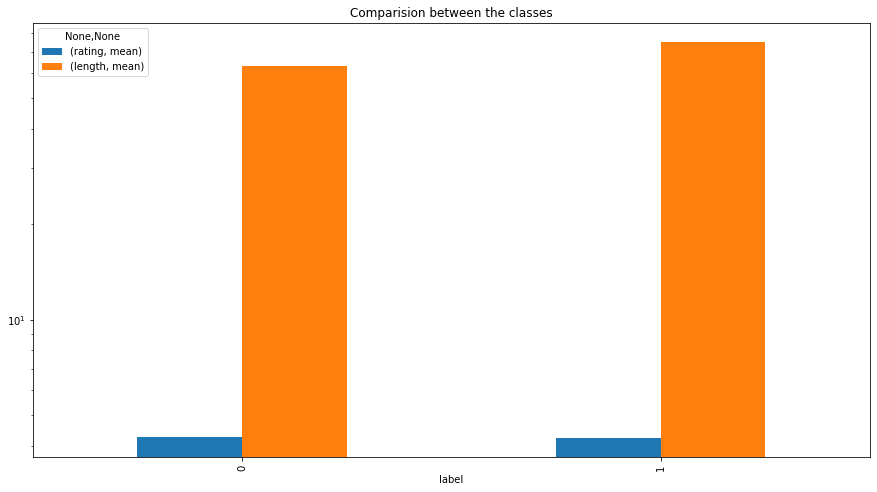

In [200]:
#view=data_sample.groupby('label').agg([np.mean])
#view.plot(kind='bar',figsize=(15,8),title='Comparision between the classes',logy=True)

<AxesSubplot:xlabel='length', ylabel='Density'>

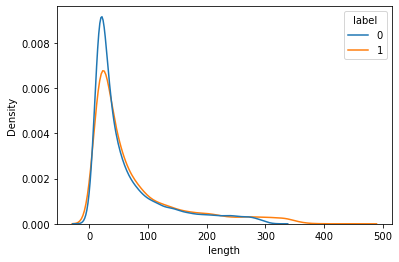

In [150]:
#use different plot to show the relationship between rating and length of the text
sns.kdeplot(data=data_sample, x="length", hue="label")

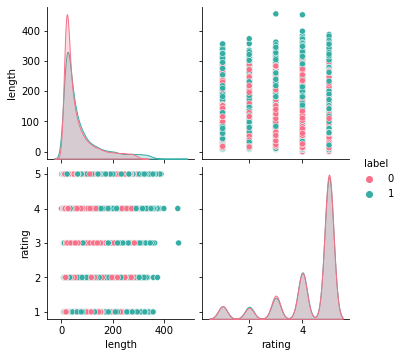

In [142]:
sns.pairplot(data_sample, vars=["length",'rating'],hue='label',palette="husl")    
plt.show()  

In [23]:
from nltk.probability import FreqDist

In [24]:
#data_sample.to_csv('data_sample.csv')

In [31]:
%%time
data_sample["text_processed"]=data_sample["text_processed"].apply(stem_and_lemmatize)
print('2 done')
data_sample["text_processed"]=data_sample["text_processed"].apply(remove_stopwords)

data_sample.head()

2 done
CPU times: total: 1min 16s
Wall time: 1min 25s


,category,rating,label,text,text_processed,length
26904,Kindle_Store_5,5.0,1,This was the second book in the Love by Design...,"[thi, wa, second, book, love, design, seri, lo...",99
4417,Sports_and_Outdoors_5,4.0,1,this thing is great. I would appreciate it if...,"[thi, thing, great, would, appreci, wa, cheaper]",12
15772,Tools_and_Home_Improvement_5,3.0,0,not sure who designed this; it looks nice and ...,"[sure, design, thi, look, nice, instruct, pret...",16
9498,Electronics_5,3.0,1,Connections are light duty and can break as mi...,"[connect, light, duti, break, mine, come, powe...",33
29211,Books_5,1.0,1,I put this book down after reading first few c...,"[put, thi, book, read, first, chapter, believ,...",24


In [32]:
data_sample.head(30)

,category,rating,label,text,text_processed,length
26904,Kindle_Store_5,5.0,1,This was the second book in the Love by Design...,"[thi, wa, second, book, love, design, seri, lo...",99
4417,Sports_and_Outdoors_5,4.0,1,this thing is great. I would appreciate it if...,"[thi, thing, great, would, appreci, wa, cheaper]",12
15772,Tools_and_Home_Improvement_5,3.0,0,not sure who designed this; it looks nice and ...,"[sure, design, thi, look, nice, instruct, pret...",16
9498,Electronics_5,3.0,1,Connections are light duty and can break as mi...,"[connect, light, duti, break, mine, come, powe...",33
29211,Books_5,1.0,1,I put this book down after reading first few c...,"[put, thi, book, read, first, chapter, believ,...",24
34789,Toys_and_Games_5,5.0,0,"My 7 year old daughter, who has the Legos and ...","[year, old, daughter, ha, lego, ha, lot, lego,...",35
31473,Books_5,5.0,1,If you think small town living is safer than b...,"[think, small, town, live, safer, big, citi, t...",97
31909,Books_5,4.0,0,"This is a great mystery, and an entertaining r...","[thi, great, mysteri, entertain, read, keep, e...",121
7071,Sports_and_Outdoors_5,5.0,1,BEST BARREL SQUEEGIE/SWAB I'VE EVER USED IN TH...,"[best, barrel, squeegi, swab, ever, use, year,...",91
2571,Home_and_Kitchen_5,5.0,0,This rug is amazing for the price and quality....,"[thi, rug, amaz, price, qualiti, purchas, futu...",47


# Find the top 15 common words in computer-generated reviews

In [191]:
list_of_words_cg1=data_sample[data_sample['label']==0]['text_processed'].tolist()

In [192]:
len(list_of_words_cg1)

15044

In [193]:
bow1=[]
for lists in list_of_words_cg1:
    for word in lists:
        bow1.append(word)
freq_dist_cg=FreqDist(bow1)
top_10_cg=freq_dist_cg.most_common(15)

In [194]:
top_10_cg

[('thi', 21021),
 ('veri', 11514),
 ('wa', 10866),
 ('love', 9461),
 ('great', 8386),
 ('book', 8375),
 ('good', 6976),
 ('one', 5760),
 ('read', 5506),
 ('stori', 5190),
 ('use', 4901),
 ('like', 4797),
 ('well', 4770),
 ('would', 4456),
 ('littl', 3980)]

In [195]:
cg=dict(top_10_cg)

In [196]:
word_features_cg, freq_cg = [[x for x,y in top_10_cg],
      [y for x,y in top_10_cg]]

In [197]:
df_cg=pd.DataFrame()

In [198]:
df_cg['word']=pd.DataFrame(word_features_cg)
df_cg['frequency']=pd.DataFrame(freq_cg)

In [199]:
df_cg

,word,frequency
0,thi,21021
1,veri,11514
2,wa,10866
3,love,9461
4,great,8386
5,book,8375
6,good,6976
7,one,5760
8,read,5506
9,stori,5190


Text(0.5, 1.0, 'The top 15 common words in computer-generated reviews')

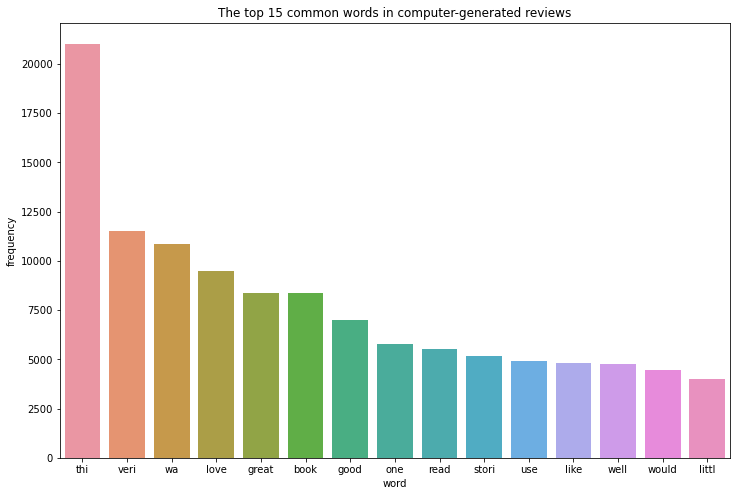

In [200]:
plt.figure(figsize=(12,8))
sns.barplot(x="word", y="frequency", data=df_cg)
plt.title('The top 15 common words in computer-generated reviews')

# Find the top 15 common words in original reviews

In [201]:
list_of_words_or=data_sample[data_sample['label']==1]['text_processed'].tolist()

In [202]:
len(list_of_words_or)

14956

In [203]:
bow1=[]
for lists in list_of_words_or:
    for word in lists:
        bow1.append(word)
freq_dist_or=FreqDist(bow1)
top_10_or=freq_dist_or.most_common(15)

In [204]:
top_10_or

[('thi', 16492),
 ('wa', 8598),
 ('one', 5403),
 ('love', 4728),
 ('book', 4697),
 ('like', 4630),
 ('use', 4422),
 ('great', 4366),
 ('veri', 4337),
 ('good', 3592),
 ('get', 3568),
 ('work', 3435),
 ('well', 3263),
 ('read', 3235),
 ('would', 3229)]

In [205]:
word_features_or, freq_or = [[x for x,y in top_10_or],
      [y for x,y in top_10_or]]

In [206]:
df_cg['word_or']=pd.DataFrame(word_features_or)
df_cg['frequency_or']=pd.DataFrame(freq_or)

In [207]:
df_cg

,word,frequency,word_or,frequency_or
0,thi,21021,thi,16492
1,veri,11514,wa,8598
2,wa,10866,one,5403
3,love,9461,love,4728
4,great,8386,book,4697
5,book,8375,like,4630
6,good,6976,use,4422
7,one,5760,great,4366
8,read,5506,veri,4337
9,stori,5190,good,3592


Text(0.5, 1.0, 'The top 15 common words in original reviews')

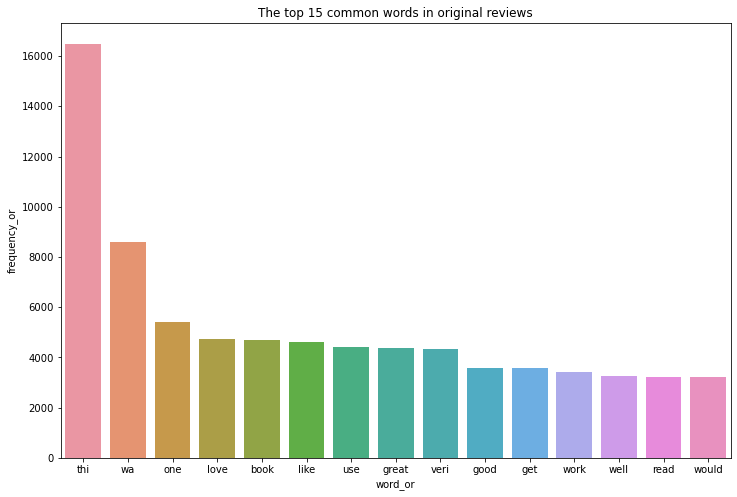

In [208]:
plt.figure(figsize=(12,8))
sns.barplot(x="word_or", y="frequency_or", data=df_cg)
plt.title('The top 15 common words in original reviews')

In [111]:
#df_cg.to_csv('df_cg.csv')

# NLP

In [19]:
from nltk.probability import FreqDist

In [20]:
list_of_words = data_sample["text_processed"].tolist()
list_of_words

# Create one list of all words
bow = []
for lists in list_of_words:
    for word in lists:
        bow.append(word)
#print(bow)

# Create frequency with words
freq_dist = FreqDist(bow)
top_5000 = freq_dist.most_common(5000)

In [21]:
word_features, freq = [[x for x,y in top_5000],
      [y for x,y in top_5000]]

In [22]:
%%time
def find_features(lst, bow):
    word_features=list(bow)
    words = set(lst)
    features = {}
    for w in word_features:
        features[w] = (w in words)
    return features

word_features
features=[]
for i,l in enumerate(data_sample["text_processed"]):
    s=[find_features(l,bow),data_sample["label"].iloc[i]]
    z=tuple(s)
    features.append(z)
len(features)

CPU times: total: 8min 4s
Wall time: 8min 20s


10000

In [23]:
#train test split

In [24]:
train_set, test_set = features[5000:], features[:5000]

In [25]:
%%time
classifier = nltk.NaiveBayesClassifier.train(train_set)

CPU times: total: 1min 42s
Wall time: 1min 44s


In [26]:
classifier.show_most_informative_features(15)

Most Informative Features
                 sometim = True                1 : 0      =     23.8 : 1.0
                    drop = True                1 : 0      =     23.2 : 1.0
                     pop = True                1 : 0      =     19.1 : 1.0
                    noth = True                1 : 0      =     17.7 : 1.0
                   offer = True                1 : 0      =     17.1 : 1.0
                    pick = True                1 : 0      =     16.3 : 1.0
                 comment = True                1 : 0      =     15.1 : 1.0
                    gone = True                1 : 0      =     15.1 : 1.0
                    plan = True                1 : 0      =     15.1 : 1.0
                unfortun = True                1 : 0      =     15.1 : 1.0
                  though = True                1 : 0      =     14.8 : 1.0
                   least = True                1 : 0      =     14.5 : 1.0
                  measur = True                1 : 0      =     14.4 : 1.0

In [28]:
#nltk.classify.accuracy(classifier, test_set)

0.7046

In [29]:
#import pickle

In [30]:
#import pickle

#pickle.dump(classifier, open('model_text.p', 'wb'))

In [33]:
#file=open(r'C:\Users\Admin\IH-Labs\final-project\list.bin','wb')
#pickle.dump(word_features,file)
#file.close()

# Use the classifier model to label the new dataset

In [ ]:
#import verified dataset

In [9]:
validated_data=pd.read_csv(r'C:\Users\Admin\IH-Labs\Bootcamp_final_project\csv_file\Amazon_web_scrapping.csv')

In [10]:
validated_data=validated_data.drop('Unnamed: 0',axis=1)

In [11]:
validated_data

,text
0,The phone I received was by all estimations br...
1,I purchased this phone with the intent of havi...
2,This is my 2nd used iphone Ive gotten from Ama...
3,I’ve had the phone for almost 10 months now an...
4,I asked for my phone to be renewed fairly okay...
...,...
4995,the phone is as neat as a brand new one which ...
4996,Everything works great!!! 5 out of 5 stars!!
4997,Came with gorilla glass on the screen great qu...
4998,I was lukewarm about buying this phone but I a...


In [113]:
%%time
validated_data["text_processed"]=validated_data["text"].apply(clean_up)
print('1 done')

validated_data.head()

1 done
CPU times: total: 0 ns
Wall time: 2 ms


,text,text_processed
0,sesuai deskripsi mantap.👍,sesuai deskripsi mantap
1,Have a nice day. I announced my order for tod...,have a nice day i announced my order for today...
2,Really pleased with the phone... Came in beaut...,really pleased with the phone came in beautifu...
3,Werry good servis. Phone samsung galaxy s21 ul...,werry good servis phone samsung galaxy s ultra...
4,very happy with this purchase,very happy with this purchase


In [114]:
%%time
validated_data['text_processed']=validated_data['text_processed'].apply(tokenize)
print('1 done')
validated_data["text_processed"]=validated_data["text_processed"].apply(stem_and_lemmatize)
print('2 done')
validated_data["text_processed"]=validated_data["text_processed"].apply(remove_stopwords)

validated_data.head()

1 done
2 done
CPU times: total: 31.2 ms
Wall time: 41 ms


,text,text_processed
0,sesuai deskripsi mantap.👍,"[sesuai, deskripsi, mantap]"
1,Have a nice day. I announced my order for tod...,"[nice, day, announc, order, today, order, numb..."
2,Really pleased with the phone... Came in beaut...,"[realli, plea, phone, came, beauti, condit, new]"
3,Werry good servis. Phone samsung galaxy s21 ul...,"[werri, good, servi, phone, samsung, galaxi, u..."
4,very happy with this purchase,"[veri, happi, thi, purchas]"


In [116]:
def find_features_1(w):

    features={}

    features[w]=(w in word_features)
    return features

In [125]:
list2=[]
for i in range(25):
    fake=0
    real=0
    for j in range(len(validated_data.text_processed.iloc[i])):
        classResult = classifier.classify(find_features_1(validated_data.text_processed.iloc[i][j]))
        if classResult == 0:
            fake=fake+1
        else:
            real=real+1
    print(fake," ",real)
    if fake>real:
        label_test=0
    else:
        label_test=1
    list2.append(label_test)

3   0
4   10
2   5
8   4
4   0
0   1
8   35
3   11
6   12
6   3
1   3
3   2
6   12
4   6
1   3
1   2
2   1
0   0
1   0
1   0
1   0
6   10
4   6
8   11
1   1


In [126]:
validated_data['label']=pd.DataFrame(list2)

In [128]:
validated_data

,text,text_processed,label
0,sesuai deskripsi mantap.👍,"[sesuai, deskripsi, mantap]",0
1,Have a nice day. I announced my order for tod...,"[nice, day, announc, order, today, order, numb...",1
2,Really pleased with the phone... Came in beaut...,"[realli, plea, phone, came, beauti, condit, new]",1
3,Werry good servis. Phone samsung galaxy s21 ul...,"[werri, good, servi, phone, samsung, galaxi, u...",0
4,very happy with this purchase,"[veri, happi, thi, purchas]",0
5,Thanks,[thank],1
6,Posting this on the 29th. My return option run...,"[post, thi, th, return, option, run, st, tri, ...",1
7,"Paid £1000 for a phone, the next day the selle...","[paid, phone, next, day, seller, cancel, order...",1
8,"Lovely phone, had some scratches on the back, ...","[love, phone, scratch, back, seem, new, mark, ...",1
9,great very helpful would recommend them 👍 g...,"[great, veri, help, would, recommend, great, s...",0
